# Special topics: Machine learning

Machine learning can mean a number of different things, but some of the key ideas are that an algorithm is applied to a dataset (or training dataset) in order to objectively characterize, classify, or 'fit' the data. The core package that we will use is `scikit_learn`, which contains a number of different algorithms with a common API. To determin which algorithms might be most effective in analysis of a particular dataset, follow this [flowchart](http://scikit-learn.org/stable/tutorial/machine_learning_map/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## SVD

One common method used to determine the primary modes of variability within a data set it Principle Component Analysis (PCA). This approach requires breaking down the data into Emperical Orthogonal Functions (EOFs), or, more generally, a Singular Value Decomposition (SVD). 

### Geometric interpretation of SVD

The singular value decomposition $\mathbf{M} = U \Sigma V^*$ may be thought of as a series of geometric transformations that reproduce the total transformation performed by $\mathbf{M} x$. See: https://en.wikipedia.org/wiki/Singular_value_decomposition

[ 1.53851648  0.46148352]


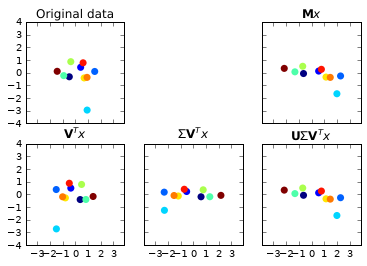

In [4]:
# The tranformation matrix
M = np.array([[ 1.50,-0.20], 
              [-0.20, 0.50]])

# Generate some random points scattered around the origin
N = 10
x = np.random.randn(2, N)

# Transform the points into the new coordinate system
x_trans = np.dot(M, x)
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, squeeze=True, subplot_kw={'aspect': 1.0})

# Plot the original and transformed data
axs[0, 0].scatter(x[0], x[1], 50, np.arange(N), edgecolor='none')
axs[0, 0].set_title('Original data')
axs[0, 1].set_axis_off()
axs[0, 2].scatter(x_trans[0], x_trans[1], 50, np.arange(N), edgecolor='none')
axs[0, 2].set_title(r'$\mathbf{M} x$')

# Break the transformation down into a singular value decomposition
u, sigma, vt = np.linalg.svd(M)
vtx = np.dot(vt, x)
sigmavtx = np.dot(np.diag(sigma), vtx)
usigmavtx = np.dot(u, sigmavtx)

# Plot the three transforamtional steps in the SVD
axs[1, 0].scatter(vtx[0], vtx[1], 50, np.arange(N), edgecolor='none')
axs[1, 0].set_title(r'$\mathbf{V}^T x$')
axs[1, 1].scatter(sigmavtx[0], sigmavtx[1], 50, np.arange(N), edgecolor='none')
axs[1, 1].set_title(r'$\Sigma \mathbf{V}^T x$')
axs[1, 2].scatter(usigmavtx[0], usigmavtx[1], 50, np.arange(N), edgecolor='none')
axs[1, 2].set_title(r'$\mathbf{U} \Sigma \mathbf{V}^T x$')

ax = axs[0, 0]
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
print(sigma)

### Using SVD for Principal Component Analysis (PCA)

Principal Component Analysis is a method to find the primary ways in which different components of a dataset covary. Let's say we have `N` sites, and there is a 'signal' common to all of them, with some additional random noise per site. PCA will expose this common signal.

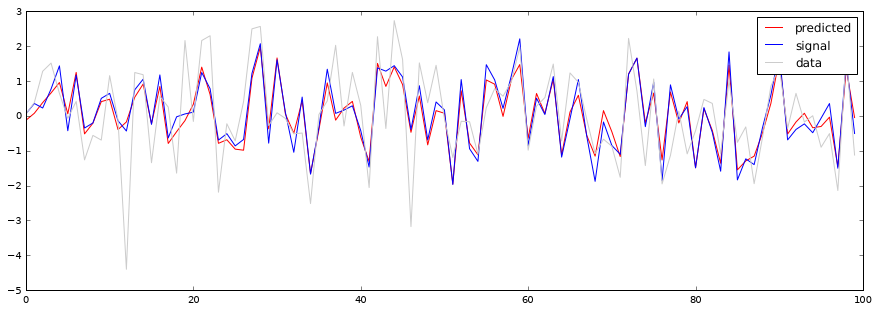

In [90]:
Nsites = 20
Ntimes = 100

# The amplitude of the signal at the different sites
amplitudes = np.random.randn(Nsites)

signal = np.random.randn(Ntimes)[:,np.newaxis] * amplitudes[np.newaxis, :]

data = signal + np.random.randn(Ntimes, Nsites)

u, sigma, vt = np.linalg.svd(data, full_matrices=False)

predicted_signal = u[:, 0] * sigma[0]
predicted_amplitudes = vt[0, :]

site = 6
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.plot(predicted_amplitudes[site] * predicted_signal, '-r', label='predicted')
ax.plot(signal[:, site], '-b', label='signal')
ax.plot(data[:, site], '-', color='0.8', label='data')
ax.legend()


### Using SVD for image compression.

Compressed images, like JPG, use a method that only includes the largest variations in an image (or, more specifically, in a small section of the image). Here we show how the data contained in an image can be compressed considerably, while retaining most of the information contained in the image.

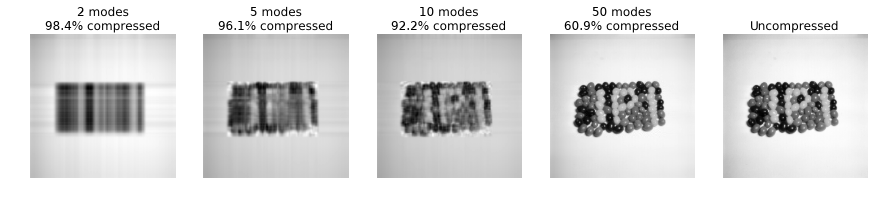

In [91]:
from PIL import Image

# Image source: https://en.wikipedia.org/wiki/Standard_test_image
JB = Image.open("SIPI_Jelly_Beans_4.1.07.tiff") 
im = np.array(JB).sum(axis=-1) # sum color bands to get psudo-grayscale

# Decompose image
u, sigma, vt = np.linalg.svd(im)

Ncompression = [2, 5, 10, 50]
fig, axs = plt.subplots(1, 5, figsize=(15, 3), squeeze=True,)

for Nsubplot in range(4):
    D = np.zeros((len(sigma), len(sigma)))
    modes = Ncompression[Nsubplot]
    D[:modes, :modes] = np.diag(sigma[:modes])
    im_compressed = np.dot(u, np.dot(D, vt))
    compression_ratio = 100.0 - 100.0*(256*2*modes + modes)/(256**2)
    axs[Nsubplot].imshow(im_compressed, cmap='gray')
    axs[Nsubplot].set_title('%d modes\n%4.1f%% compressed' % (modes, compression_ratio))
    axs[Nsubplot].set_axis_off()

axs[-1].imshow(im, cmap='gray')
axs[-1].set_title('Uncompressed')
axs[-1].set_axis_off()

## Classification

Machine learning can be used to automatically classify data in groups based on similarities in different data points.

Here is a simmple exmaple of classification based on spatial location. First create a dataset where the points are grouped in a few sets of discreet bloobs. The `X` data are the spatial locations. The `y` data contains the assigned blob; this is the parameter that we are trying to predict.

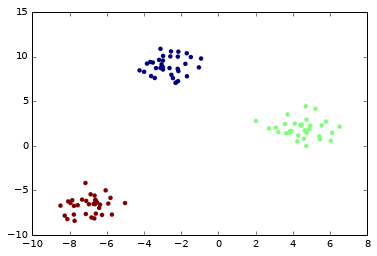

In [38]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42, centers=3)

# Add some covariance between the blobs. 
# This may be used to merge them slightly as a test of the classification system.
# X[:,1] += 0.25*X[:,0]**2

# plt.scatter(X[:, 0], X[:, 1], 20, y, edgecolor='none')    # look at the answer.
plt.plot(X[:, 0], X[:, 1], 'ok')   # this shows what we will feed the algorithm

Labels: 
 [1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]
Data: 
 [2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]
[[-2.66780392  8.93576069]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]]


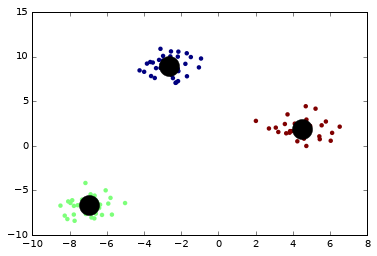

In [95]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering

# Here we can estimate the cluster by a number of different algoriths. 
# Uncomment the one you want to use
# cluster = AffinityPropagation()
cluster = KMeans(n_clusters=3)
# cluster = SpectralClustering(n_clusters=3)

# kmeans.fit(X)
# kmeans.labels_
# labels = cluster.predict(X)
labels = cluster.fit_predict(X)

print('Labels: \n', labels)
print('Data: \n', y)
print(cluster.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1], 20, labels, edgecolor='none')
for n in range(3):
    plt.plot(cluster.cluster_centers_[n, 0], cluster.cluster_centers_[n, 1], 'ok', markersize=20)

## Supervised learning

Here we take a look at a pedagogical dataset used to demonstrate supervised learning. The dataset comprises of 1797 handwritten digets that have been converted to 8x8 images, and labeled with the appropriate number they represent.

1797  images loaded


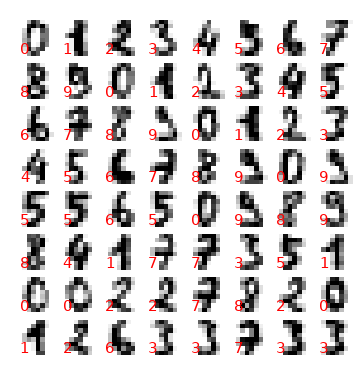

In [115]:
from sklearn.datasets import load_digits

digits = load_digits()
print(len(digits.images), ' images loaded')

fig = plt.figure(figsize=(6, 6))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.matshow(digits.images[i], cmap=plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]), fontsize=15, color='r')
    ax.axis('off')

### Visualize the data.

Let's use PCA-style analysis to see if we can find patters of variability in the dataset. 

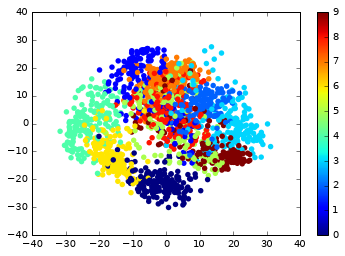

In [108]:
from sklearn.decomposition import RandomizedPCA, PCA

pca = PCA(n_components=2)
# pca = RandomizedPCA(n_components=2)

proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], 30, digits.target, edgecolor='none')
plt.colorbar()

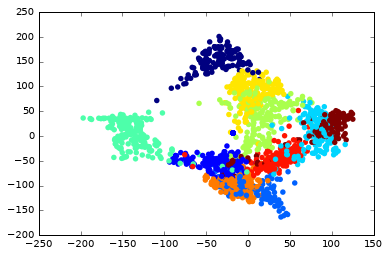

In [105]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)
plt.scatter(proj[:, 1], proj[:, 0], 30, digits.target, edgecolor='none')

### Unsupervised learning

We will use clustering in a manner similar to the blob identification to separate the digits into 10 clusters. Note, here the digits will be identified and separated into 10 clusters, but the clusters will have no meaning other than being a distinct grouping of the data.

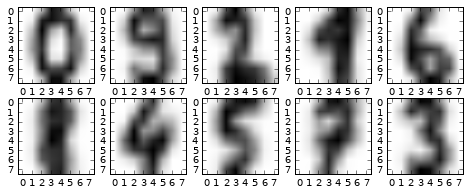

In [109]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit(digits.data)
# kmeans.cluster_centers_.shape

fig, axs = plt.subplots(2, 5, figsize=(8, 3))
axs = axs.flatten()
for n in range(10):
    axs[n].imshow(kmeans.cluster_centers_[n].reshape(8, 8), cmap=plt.cm.gray_r)

### Supervised learning

In order to give the clusters meaning, that is to have the digit images associated with actual numbers, we need to use a 'training' dataset where the labels are know. We can then apply the 'fit' obtained from this training dataset to 'predict' the value associated with other images.

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

clf = GaussianNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

In [113]:
from sklearn import metrics
print('CLASSIFICATION REPORT:\n')
print(metrics.classification_report(expected, predicted))
print('CONFUSION MATRIX:\n')
print(metrics.confusion_matrix(expected, predicted))

CLASSIFICATION REPORT:

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.75      0.70      0.72        56
          2       0.91      0.41      0.56        49
          3       0.82      0.62      0.71        45
          4       1.00      0.87      0.93        39
          5       0.92      0.95      0.94        38
          6       0.96      0.94      0.95        48
          7       0.84      1.00      0.91        47
          8       0.37      0.80      0.51        46
          9       1.00      0.62      0.76        39

avg / total       0.85      0.78      0.79       450

CONFUSION MATRIX:

[[42  0  0  0  0  0  0  1  0  0]
 [ 0 39  2  0  0  0  1  0 14  0]
 [ 0  3 20  1  0  0  0  0 25  0]
 [ 0  1  0 28  0  1  0  2 13  0]
 [ 1  1  0  0 34  0  1  1  1  0]
 [ 0  0  0  0  0 36  0  1  1  0]
 [ 0  3  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  3  0  4  0  1  0  1 37  0]
 [ 0  2  0  1  0  1  

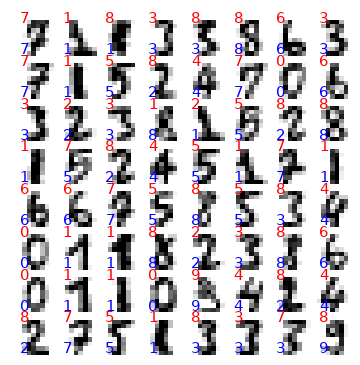

In [117]:
fig = plt.figure(figsize=(6, 6))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.matshow(X_test[i].reshape(8, 8), cmap=plt.cm.binary)
    ax.text(0, 7, str(expected[i]), fontsize=15, color='b')
    ax.text(0, 0, str(predicted[i]), fontsize=15, color='r')
    ax.axis('off')